In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Преобразование Бокса-Кокса

Если случайная величина имеет логнормальное распределение, то ее логарифм имеет нормальное распределение.

In [2]:
data_log = pd.Series(np.random.lognormal(0, 1, 1000))

<AxesSubplot:>

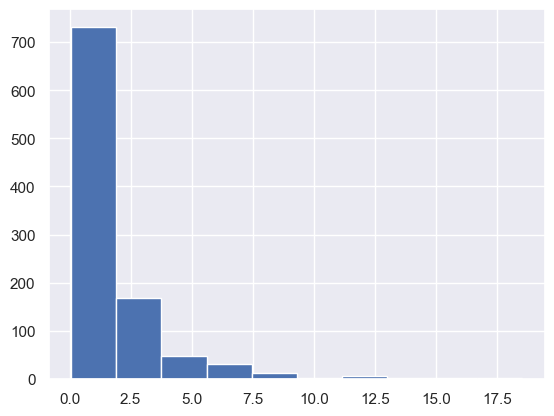

In [3]:
data_log.hist()

<AxesSubplot:>

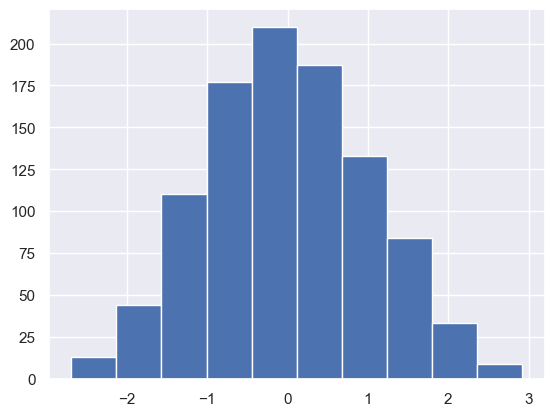

In [4]:
np.log(data_log).hist()

Почему это работает?

C:\Users\Win10\AppData\Local\Temp\ipykernel_9060\4063628510.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


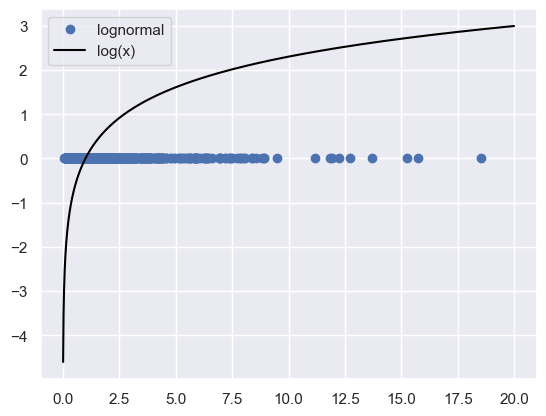

In [5]:
log_x = np.arange(0.01, 20, 0.01)
log_y = np.log(log_x)

x_points = data_log
y_points = np.zeros(1000)

fig = plt.figure()
plt.plot(x_points, y_points, 'o', label="lognormal")
plt.plot(log_x, log_y, 'black', label='log(x)')

plt.legend()

fig.show()

Если экспоненциальное распределение?

In [6]:
data_exp = pd.Series(np.random.exponential(size=1000))

<AxesSubplot:>

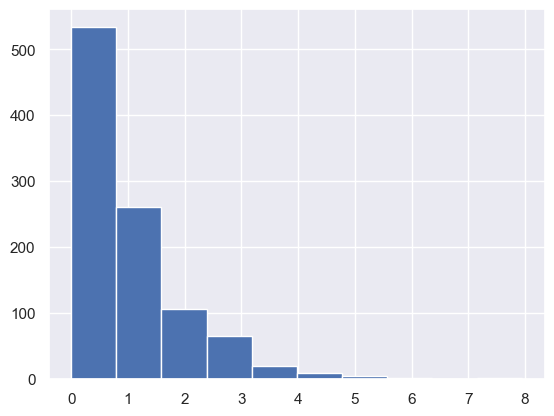

In [7]:
data_exp.hist()

<AxesSubplot:>

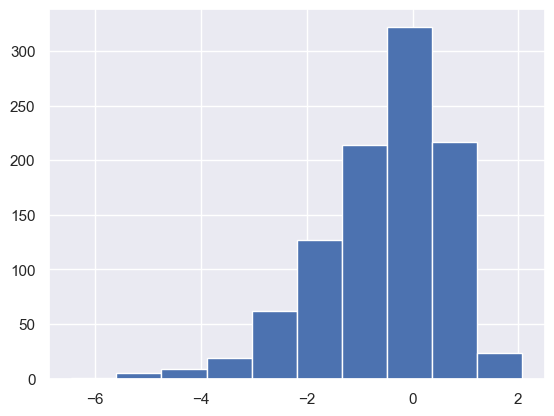

In [8]:
np.log(data_exp).hist()

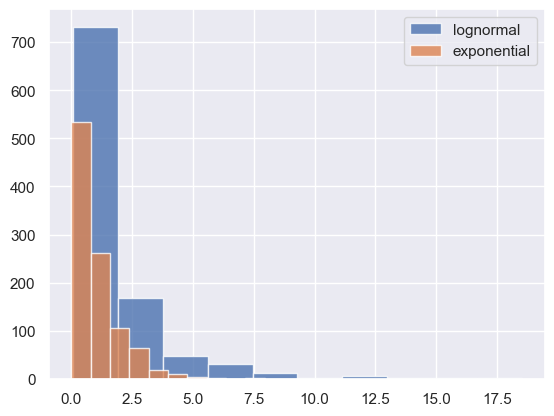

In [9]:
plt.hist(data_log, label='lognormal', alpha=.8)
plt.hist(data_exp, label='exponential', alpha=.8)
plt.legend()

plt.show()

Найдем такое преобразование.

$$\int\frac{1}{x^{1-\lambda}}=\frac{x^\lambda-1}{\lambda}+C,$$
где $\lambda$ - искомый параметр.

$$x^*_i=\begin{cases}
\ln(x), & \lambda=0 \\
\frac{x^\lambda-1}{\lambda}, & \text{в обратном случае.}
\end{cases}$$

In [10]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data_exp)

<AxesSubplot:>

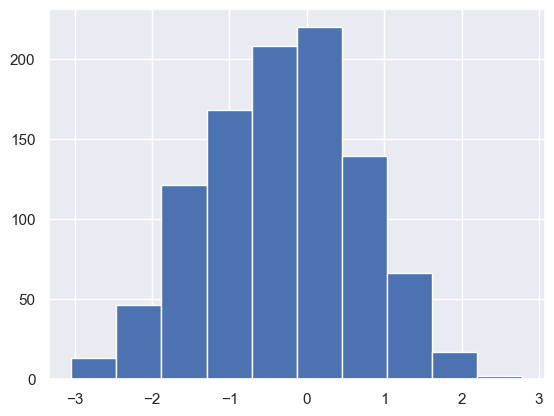

In [11]:
pd.Series(transformed_data).hist()

In [12]:
best_lambda

0.27148239860729134

# Отбор признаков

In [13]:
# df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
df = pd.read_csv('techparams_train.csv', sep=',')
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [15]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [16]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<AxesSubplot:xlabel='engine-type', ylabel='Count'>

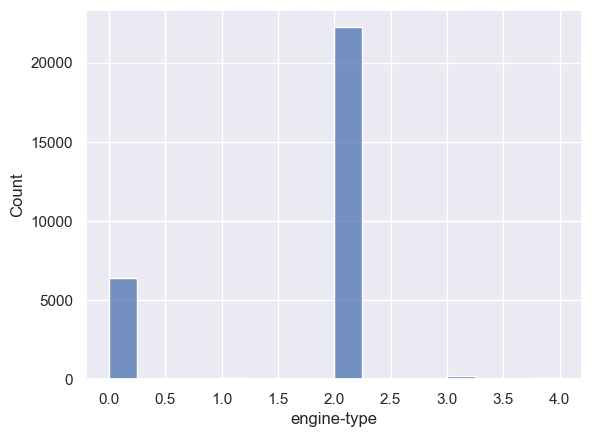

In [17]:
sns.histplot(data=train_X, x='engine-type')

In [18]:
sns.pairplot(train_X[numerical])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000029A1D5738B0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

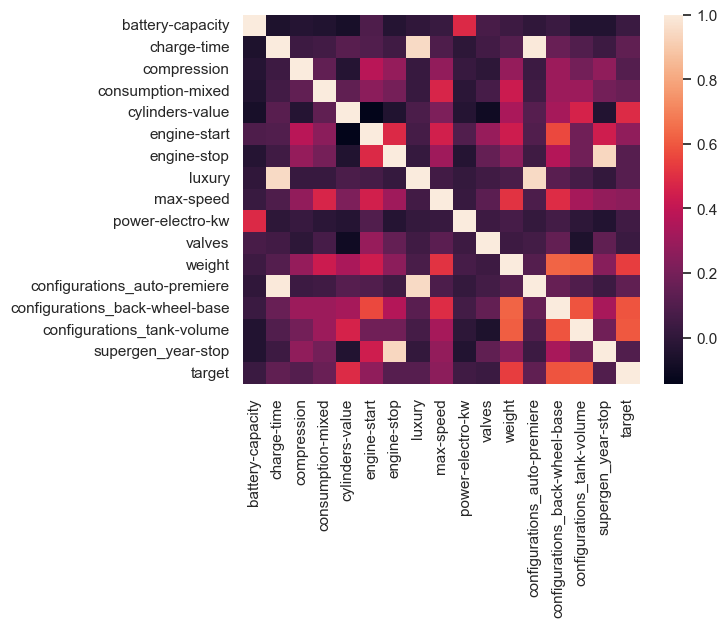

In [18]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'))

In [19]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.11003752360955568 p-value: 9.725646829197532e-79


In [20]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667100104 p-value: 5.6105473635706615e-05


## F-test

In [21]:
from sklearn.feature_selection import f_regression, SelectKBest

In [22]:
train_y.shape

(28974, 1)

In [23]:
f_statistic, p_values = f_regression(train_X, train_y)

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 1.00000000e+000])

In [25]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  2.0000e+03,
         1.6000e+01,  0.0000e+00],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  1.9960e+03,
         2.3000e+01,  0.0000e+00],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  2.0120e+03,
         1.0000e+01,  0.0000e+00],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ..., -1.0000e+00,
         2.6000e+01,  0.0000e+00],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.9950e+03,
         1.6000e+01,  0.0000e+00],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  2.0070e+03,
         3.5000e+01,  0.0000e+00]])

In [26]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'valves', 'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial'], dtype=object)

## Значения Шепли

In [27]:
 #! pip install shap

In [28]:
import shap

In [29]:
reg = LinearRegression().fit(train_X, train_y)

In [30]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

ValueError: operands could not be broadcast together with shapes (1,30) (31,) 

In [32]:
shap.summary_plot(shap_values, test_X)

NameError: name 'shap_values' is not defined

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [33]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

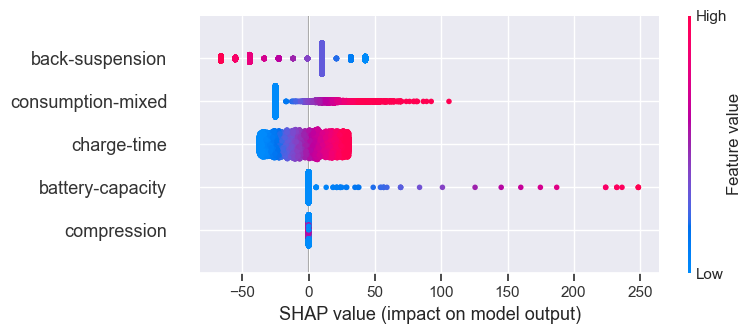

In [34]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [35]:
df = pd.read_csv('techparams_train.csv', sep=',')
x = df.drop(["target", "index"], axis=1)
y = df[["target"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)
train_cut_x = train_x[train_x.columns[:5]]
test_cut_x = test_x[train_x.columns[:5]]

In [36]:
N = list(train_cut_x.columns)

In [37]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [38]:
from math import factorial

In [39]:
shaply = {}
for i in range(len(N)):    # N - все признаки
    S = list(powerset(N[:i] + N[i+1:]))    # все подмножества признаков без i
    f_i = LinearRegression().fit(train_cut_X, train_y)
    f_ = LinearRegression().fit(train_cut_X[list(train_cut_X.columns[:i]) + list(train_cut_X.columns[i+1:])], train_y)
    # f_i - обучение модели с i-тым признаком        
    # f_ - без i
    r2_i = f_i.score(train_cut_X, train_y)
    r2_ = f_.score(train_cut_X[list(train_cut_X.columns[:i]) + list(train_cut_X.columns[i+1:])], train_y)
    summ = 0
    for s in S:
        n = (factorial(len(s)) * factorial(len(N) + len(s) - 1)) / factorial(len(N))
        summ += n * (r2_i - r2_-i)
    shaply[N[i]] = summ

In [40]:
sorted(shaply.items(), key=lambda x:x[1], reverse=True)

[('back-suspension', 159.8173466470855),
 ('battery-capacity', -9139.202625900487),
 ('charge-time', -18235.462692877925),
 ('compression', -27444.599198796706),
 ('consumption-mixed', -36502.850653427784)]

## Пермутационная важность

In [41]:
# !pip install eli5

In [42]:
import eli5
from eli5.sklearn import PermutationImportance

In [43]:
df = pd.read_csv('techparams_train.csv', sep=',')
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

In [44]:
reg = LinearRegression().fit(train_X, train_y)

In [45]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [46]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.3617 ± 0.0044,cylinders-value
0.1035 ± 0.0039,configurations_tank-volume
0.0959 ± 0.0066,configurations_seats
0.0498 ± 0.0020,engine-type
0.0466 ± 0.0009,engine-start
0.0291 ± 0.0012,configurations_auto-premiere
0.0287 ± 0.0023,charge-time
0.0196 ± 0.0027,compression
0.0193 ± 0.0019,gear-type
0.0165 ± 0.0020,weight


### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [47]:
df = pd.read_csv('techparams_train.csv', sep=',')
x = df.drop(["target", "index"], axis=1)
y = df[["target"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)
train_cut_x = train_x[train_x.columns[:5]]
test_cut_x = test_x[train_x.columns[:5]]

In [48]:
col = dict(zip(range(len(x)), train_cut_x.columns))

In [49]:
import random

In [50]:
from sklearn.metrics import r2_score

In [51]:
train_cut_x = np.array(train_cut_x)
test_cut_x = np.array(test_cut_x)
model = LinearRegression().fit(train_cut_x, train_y)

In [52]:
importance = {}
for i in range(test_cut_x.shape[1]):
    a = test_cut_x[i].copy()
    random.seed(42)
    random.shuffle(test_cut_x[i])
    prediction = model.predict(test_cut_x)
    r = r2_score(test_y, prediction)
    importance[col[i]] = r
    test_cut_x[i] = a
sorted(importance.items(), key=lambda x:x[1], reverse=True)

[('battery-capacity', 0.0365971389008477),
 ('charge-time', 0.03652033195269344),
 ('consumption-mixed', 0.036516112228610065),
 ('back-suspension', 0.036482034879079084),
 ('compression', 0.03646639845938071)]

# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [65]:
df = pd.read_csv('techparams_train.csv', sep=',')
xx = df.drop(["target", "index"], axis=1).copy()
yy = df[["target"]].copy()

In [67]:
for i in range(len(numerical)):
    xx[f'{numerical[i]}^2'] = xx[numerical[i]] ** 2
    for j in range(i + 1, len(numerical)):
        xx[f'{numerical[i]} * {numerical[j]}'] = xx[numerical[i]] * xx[numerical[j]]

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [73]:
xx.shape

(43245, 166)

In [74]:
train_x, test_x, train_y, test_y = train_test_split(xx, yy, test_size=0.33, random_state=42)

F-test

In [75]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_x, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([[ 0.000000e+00,  4.000000e+00,  1.290000e+03, ...,  5.821000e+05,
         7.075000e+04,  2.500000e+03],
       [ 0.000000e+00,  4.000000e+00,  9.350000e+02, ...,  1.525680e+06,
         6.288000e+04,  2.304000e+03],
       [ 0.000000e+00,  4.000000e+00,  1.373000e+03, ...,  1.547280e+05,
         8.724800e+04,  3.136000e+03],
       ...,
       [ 0.000000e+00,  4.000000e+00,  1.562000e+03, ...,  3.029196e+06,
         1.014320e+05,  3.844000e+03],
       [ 0.000000e+00,  4.000000e+00, -1.000000e+00, ...,  4.706000e+05,
         7.300000e+04,  2.500000e+03],
       [ 3.000000e+00,  7.000000e+00,  1.745000e+03, ...,  2.856810e+06,
         1.028940e+05,  4.356000e+03]])

In [76]:
sekector.get_feature_names_out()

array(['cylinders-order', 'cylinders-value', 'weight',
       'configurations_tank-volume', 'charge-time * weight',
       'charge-time * configurations_tank-volume', 'cylinders-value^2',
       'cylinders-value * engine-start', 'cylinders-value * weight',
       'cylinders-value * configurations_back-wheel-base',
       'cylinders-value * configurations_tank-volume',
       'engine-start * weight',
       'engine-start * configurations_tank-volume',
       'luxury * configurations_tank-volume', 'weight^2',
       'weight * configurations_back-wheel-base',
       'weight * configurations_tank-volume',
       'configurations_auto-premiere * configurations_tank-volume',
       'configurations_back-wheel-base * configurations_tank-volume',
       'configurations_tank-volume^2'], dtype=object)

In [77]:
def shap_func(my_x, my_y, N):
    shaply = {}
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)
    for i in range(len(N)):    # N - все признаки
        S = list(powerset(N[:i] + N[i+1:]))    # все подмножества признаков без i
        f_i = LinearRegression().fit(train_x, train_y)
        f_ = LinearRegression().fit(train_x[list(train_x.columns[:i]) + list(train_x.columns[i+1:])], train_y)
        # f_i - обучение модели с i-тым признаком        
        # f_ - без i
        r2_i = f_i.score(train_x, train_y)
        r2_ = f_.score(train_x[list(train_x.columns[:i]) + list(train_x.columns[i+1:])], train_y)
        summ = 0
        for s in S:
            n = (factorial(len(s)) * factorial(len(N) + len(s) - 1)) / factorial(len(N))
            summ += n * (r2_i - r2_-i)
        shaply[N[i]] = summ
    return sorted(shaply.items(), key=lambda x:x[1], reverse=True)

In [78]:
#shap_func(my_x=x, my_y=y, N=list(x.columns)) - memory error

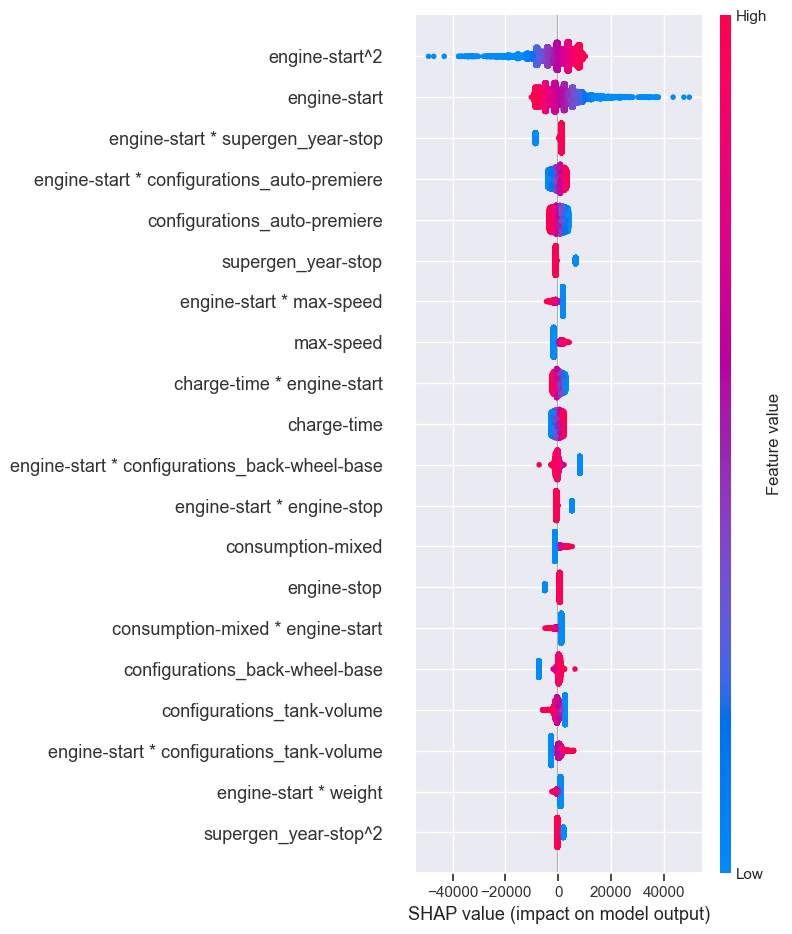

In [79]:
reg = LinearRegression().fit(train_x, train_y)

explainer = shap.Explainer(reg, train_x)
shap_values = explainer(test_x)

shap.summary_plot(shap_values, test_x)

In [80]:
reg = LinearRegression().fit(train_x, train_y)
perm = PermutationImportance(reg, random_state=42).fit(test_x, test_y)
eli5.show_weights(perm, feature_names=list(test_x.columns))

Weight,Feature
1667.8730 ± 9.3104,engine-start^2
1633.1453 ± 29.8981,engine-start
312.5523 ± 6.3441,engine-start * supergen_year-stop
186.8760 ± 3.6685,supergen_year-stop
177.4340 ± 2.0096,engine-start * configurations_back-wheel-base
149.7079 ± 1.9795,engine-start * configurations_auto-premiere
148.7117 ± 2.0868,configurations_auto-premiere
140.6877 ± 2.0516,configurations_back-wheel-base
103.2617 ± 2.1891,engine-start * engine-stop
97.2864 ± 0.9439,engine-stop


In [81]:
b = []
for i in range(len(numerical)):
    b.append(f'{numerical[i]}^2')
    for j in range(i + 1, len(numerical)):
        b.append(f'{numerical[i]} * {numerical[j]}')

In [82]:
numerical += b

<AxesSubplot:>

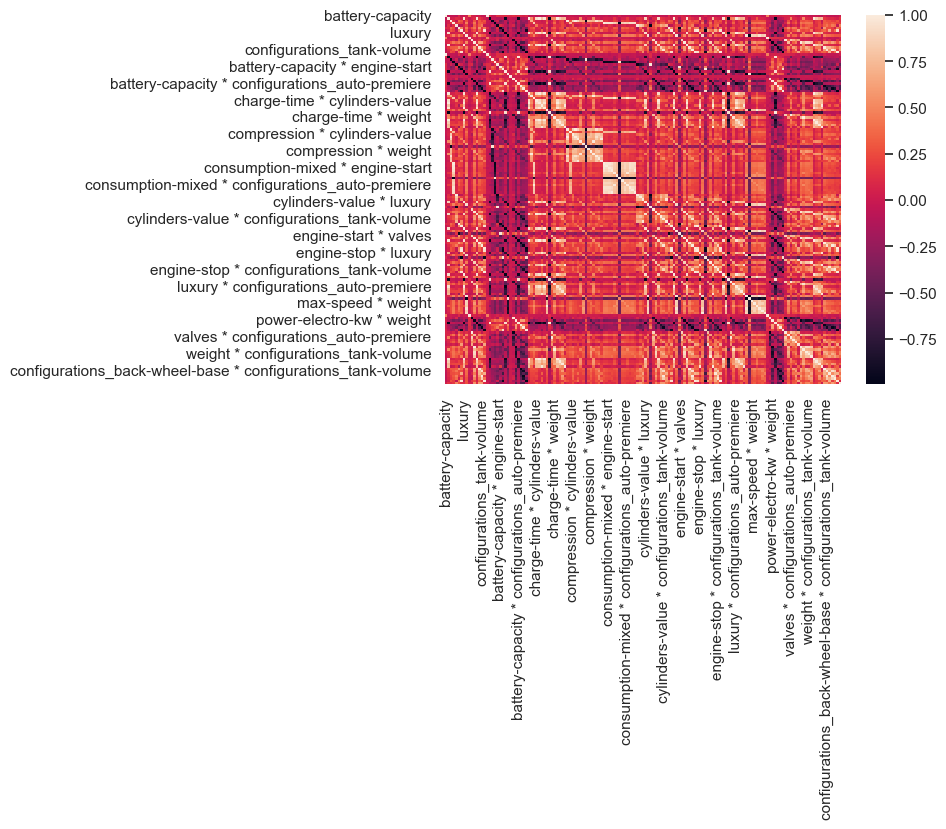

In [83]:
train = train_x
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'))